In [2]:
###############################
# Goal of this code is to generate figures for Fig.6 (contribution of each moisture budget term) and Appendix A (aqua vs. ERA5)
# 2024.4.24 originally written, updated 2024.9.20
# Mu-Ting Chien
#########################################

In [3]:
import numpy as np
import os
import sys
sys.path.append('/glade/work/muting/function/')
import KW_diagnostics as KW
import create_my_colormap as mycolor
RWB = mycolor.red_white_blue()
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap # for plotting KW composite vertical structure

/glade/u/ssg/ch/usr/jupyterhub/envs/cmip6-201910a/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
dir_out            = '/glade/work/muting/KW/'
CASENAME_LIST2     = list(['SST_AQP3_Qobs_27_-4K',\
                          'SST_AQP3_Qobs_27',\
                          'SST_AQP3_Qobs_27_4K'])
CASENAME_SHORT_LIST = list(['-4K','CTL','4K'])


icase          = 0 # 0-2 (-4K, CTL, or +4K)
icase_ref      = icase
if icase != 1:
    CASENAME       = CASENAME_LIST2[icase]+'_3h_20y_CLUBB_new'
else:
    CASENAME       = CASENAME_LIST2[icase]+'_3h_20y_CLUBB_new_uv_tendency'
output_dir = dir_out+'output_data/'+CASENAME+'/'
figdir     = dir_out+'figure/Post_general/Test_CLUBB/'+CASENAME_SHORT_LIST[icase]+'/'
#output_dir_all = dir_out+'output_data/All_3hr_10yr/' #Original directory
output_dir_all  = dir_out+'output_data/Paper4_20240822/' # updated directory
#figdir_all = dir_out+'figure/Post_general/AMS_tropical_2024/' # Original directory
figdir_all = dir_out+'figure/Post_general/Paper4_20240822/' # Updated directory
figdir_all_appendix = dir_out+'figure/Post_general/Paper4_20240822/AppendixA/' # Updated directory
os.makedirs(figdir_all,exist_ok=True) 
os.makedirs(figdir_all_appendix,exist_ok=True) 
#dir_in_aqua = dir_out+'output_data/All_3hr_10yr/left_over_for_paper4/' # original
dir_in_aqua = output_dir_all
dir_in_ERA5 = dir_out+'output_data/ERA5/'

# Constant used for KW phase composite
pi  = np.pi
PI = '\u03C0'
bin_simple = np.arange(-pi,pi+1/4*pi,1/4*pi)
bin_simple2 = np.arange(-pi,pi+1/2*pi,1/2*pi)
title = list(['(a) -4K','(b) CTL','(c) +4K'])
s2d = 86400

In [12]:
###############################################
# Load data for Fig. 1: corrcoef between q and precip 
##########################################
# 1. from ERA5
#data = np.load(dir_in_ERA5+'corrcoef_qv_pr_level.npz') #Original
data = np.load(output_dir_all+'ERA5/Corrcoef_pr_q_ERA5.npz') #Updated
r_ERA5 = data['r_qv_pr']
r_KW_ERA5 = data['r_qv_pr_kw']
r_IO_ERA5 = data['r_qv_pr_IO']
plev = data['plev']
#print(np.shape(r_ERA5), np.shape(r_KW_ERA5), np.shape(r_IO_ERA5), np.shape(plev))
r_ERA5 = (r_ERA5[1:]+r_ERA5[:-1])/2
r_KW_ERA5 = (r_KW_ERA5[1:]+r_KW_ERA5[:-1])/2
r_IO_ERA5 = (r_IO_ERA5[1:]+r_IO_ERA5[:-1])/2
plev_ERA5 = (plev[1:]+plev[:-1])/2
#print(plev_ERA5)

# 2. from aquaplanet simulations
'''
data = np.load(dir_in_aqua+'corrcoef_qv_pr_level.npz')
r = data['r_qv_pr']
r_KW = data['r_qv_pr_kw']
plev_r = data['plev']
'''
data = np.load(output_dir_all+'Corrcoef_PCQ1_q_T.npz')
r = data['r_PCQ1_q']
plev_r = data['plev']
plev_min_plot = 600 #550
plev_max_plot = 950

for icase in range(0,3):
    if icase == 0:
        r_below_600 = np.empty([np.size(plev_r),3])
        r_below_600_above_950 = np.empty([np.size(plev_r),3])
        #r_KW_below_600 = np.empty([np.size(plev_r),3])
    r_below_600[:,icase] = np.where(plev_r<plev_min_plot, np.nan, r[:,icase])
    r_below_600_above_950[:,icase] = np.where(plev_r>=plev_max_plot, np.nan, r_below_600[:,icase])
    #r_KW_below_600[:,icase] = np.where(plev_r<plev_min_plot, np.nan, r_KW[:,icase])
    
r_IO_ERA5_below_600 = np.where(plev_ERA5<plev_min_plot, np.nan, r_IO_ERA5)

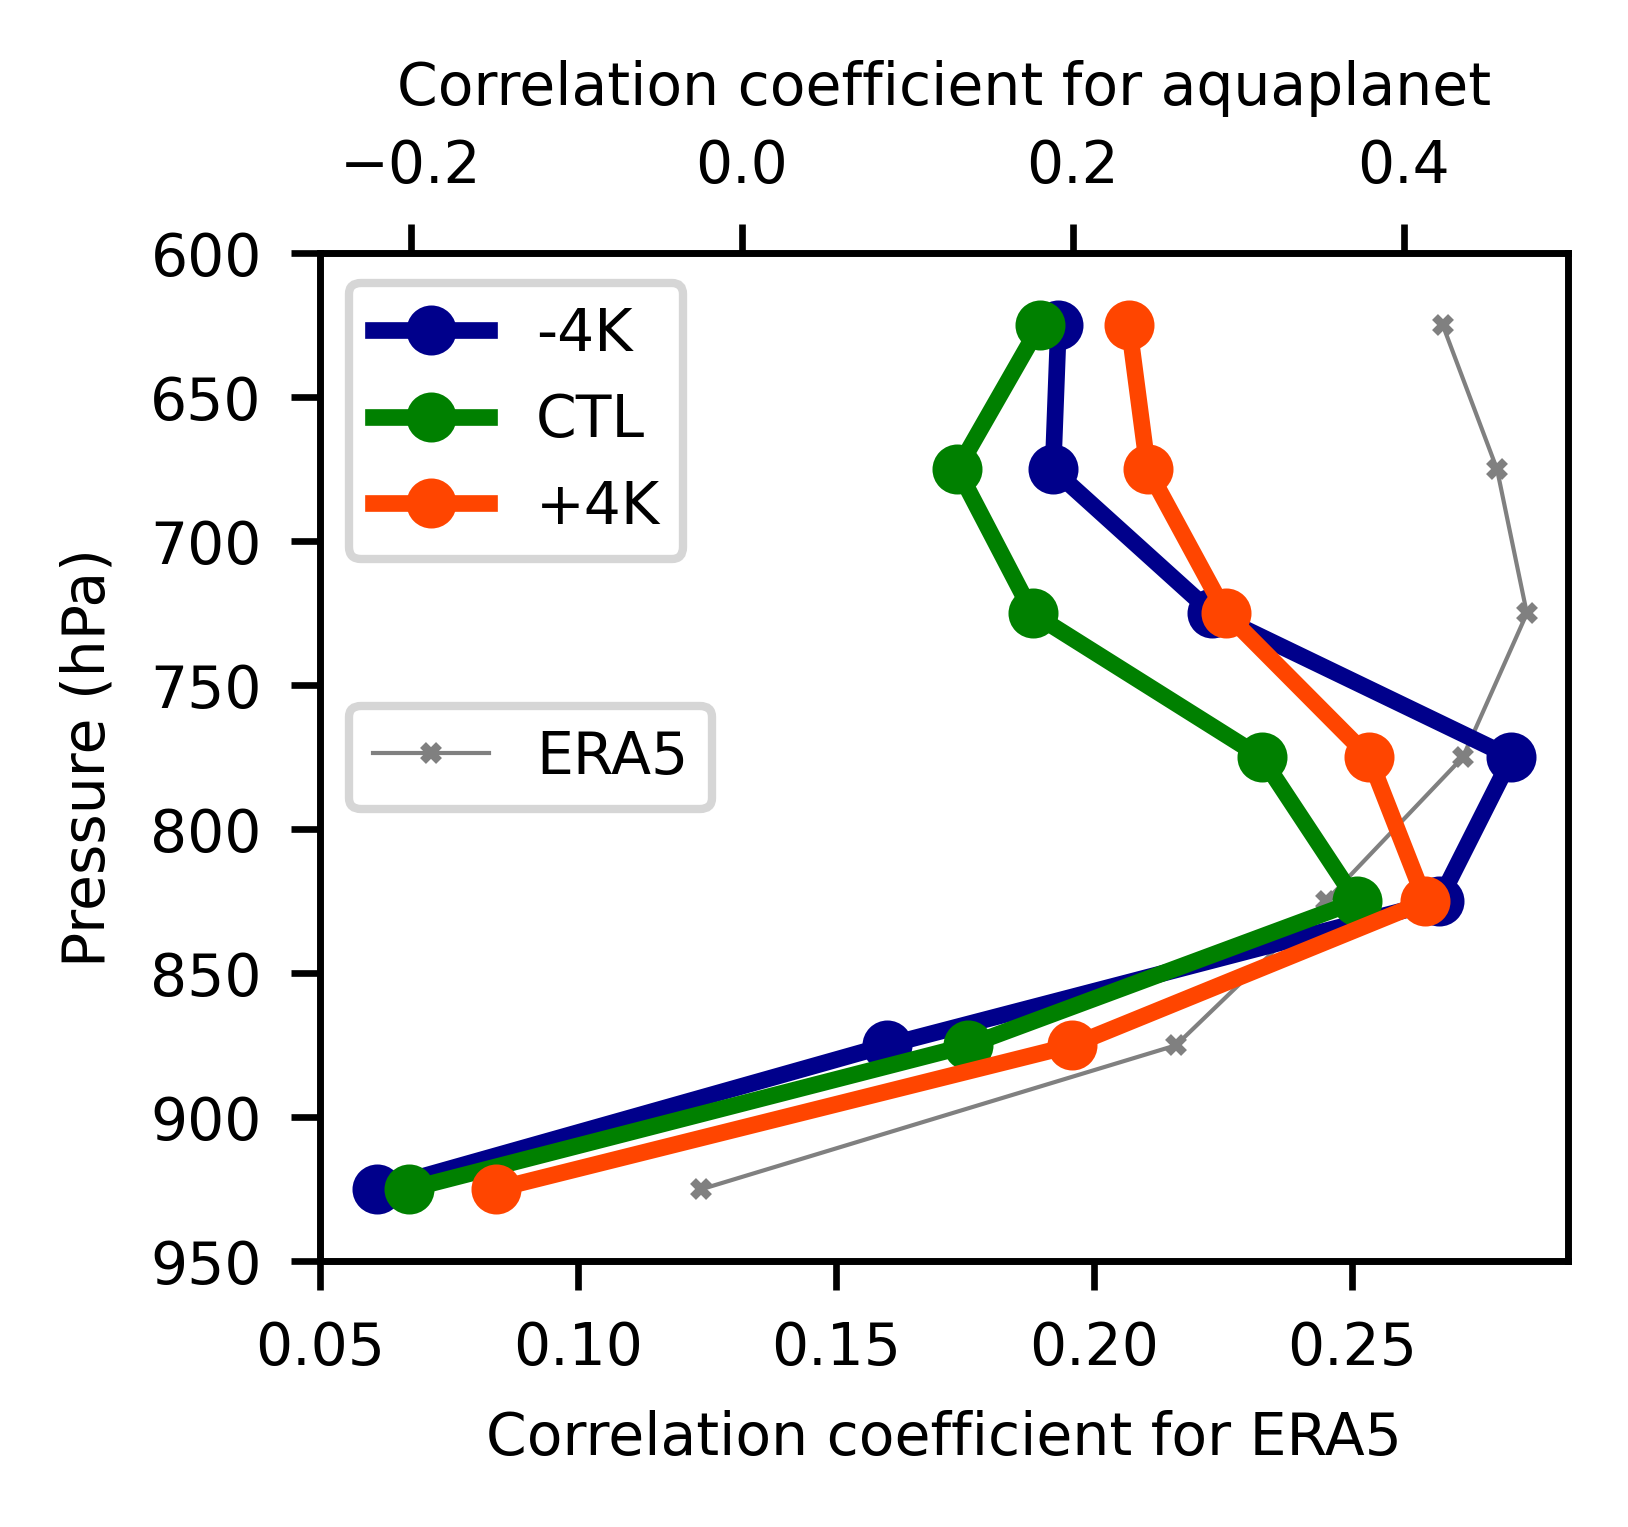

In [13]:
##########################
# Fig. A1 Corrcoef between q and precip
############################
# Plot pr_ano vs. qv_ano (not just KW)
font = 7
for iplt in range(0,1):
    fig,axes = plt.subplots(1,1,figsize=(3.2, 2.4),dpi=600)
    ax = plt.gca()
    plt.subplots_adjust(left=0.25,right=0.9,top=0.85,bottom=0.15,wspace=0.1)
    plt.rcParams.update({'font.size': font})
    if iplt == 0:
        ax.plot( r_IO_ERA5_below_600, plev_ERA5, color='grey',marker='x', markersize=2, linewidth=0.5)
        ax.set_xlabel('Correlation coefficient for ERA5')
        ax.tick_params(labelbottom=True,labeltop=False)
        ax.set_xticks(np.arange(0.05,0.3,0.05))
        ax2 = ax.twiny()
        ax2.plot(r_below_600_above_950[:,0], plev_r, color='darkblue',marker='o',markersize=5, linewidth=2)
        ax2.plot(r_below_600_above_950[:,1], plev_r, color='green',marker='o',markersize=5, linewidth=2)
        ax2.plot(r_below_600_above_950[:,2], plev_r, color='orangered',marker='o',markersize=5, linewidth=2)
        ax2.tick_params(labelbottom=False,labeltop=True)
        ax2.set_xticks(np.arange(-0.2,0.6,0.2))
        ax2.set_xlabel('Correlation coefficient for aquaplanet')  
    plt.ylim([plev_min_plot, plev_max_plot])
    plt.yticks( np.arange(plev_min_plot, 1000, 50) )
    ax2.legend(['-4K','CTL','+4K'], loc='upper left')
    ax.legend(['ERA5'], loc='center left')
    plt.gca().invert_yaxis()
    ax.set_ylabel('Pressure (hPa)')
    plt.savefig(figdir_all_appendix+'Fig.A1_corrcoef_q_pr_level.png',dpi=600)
    plt.show()

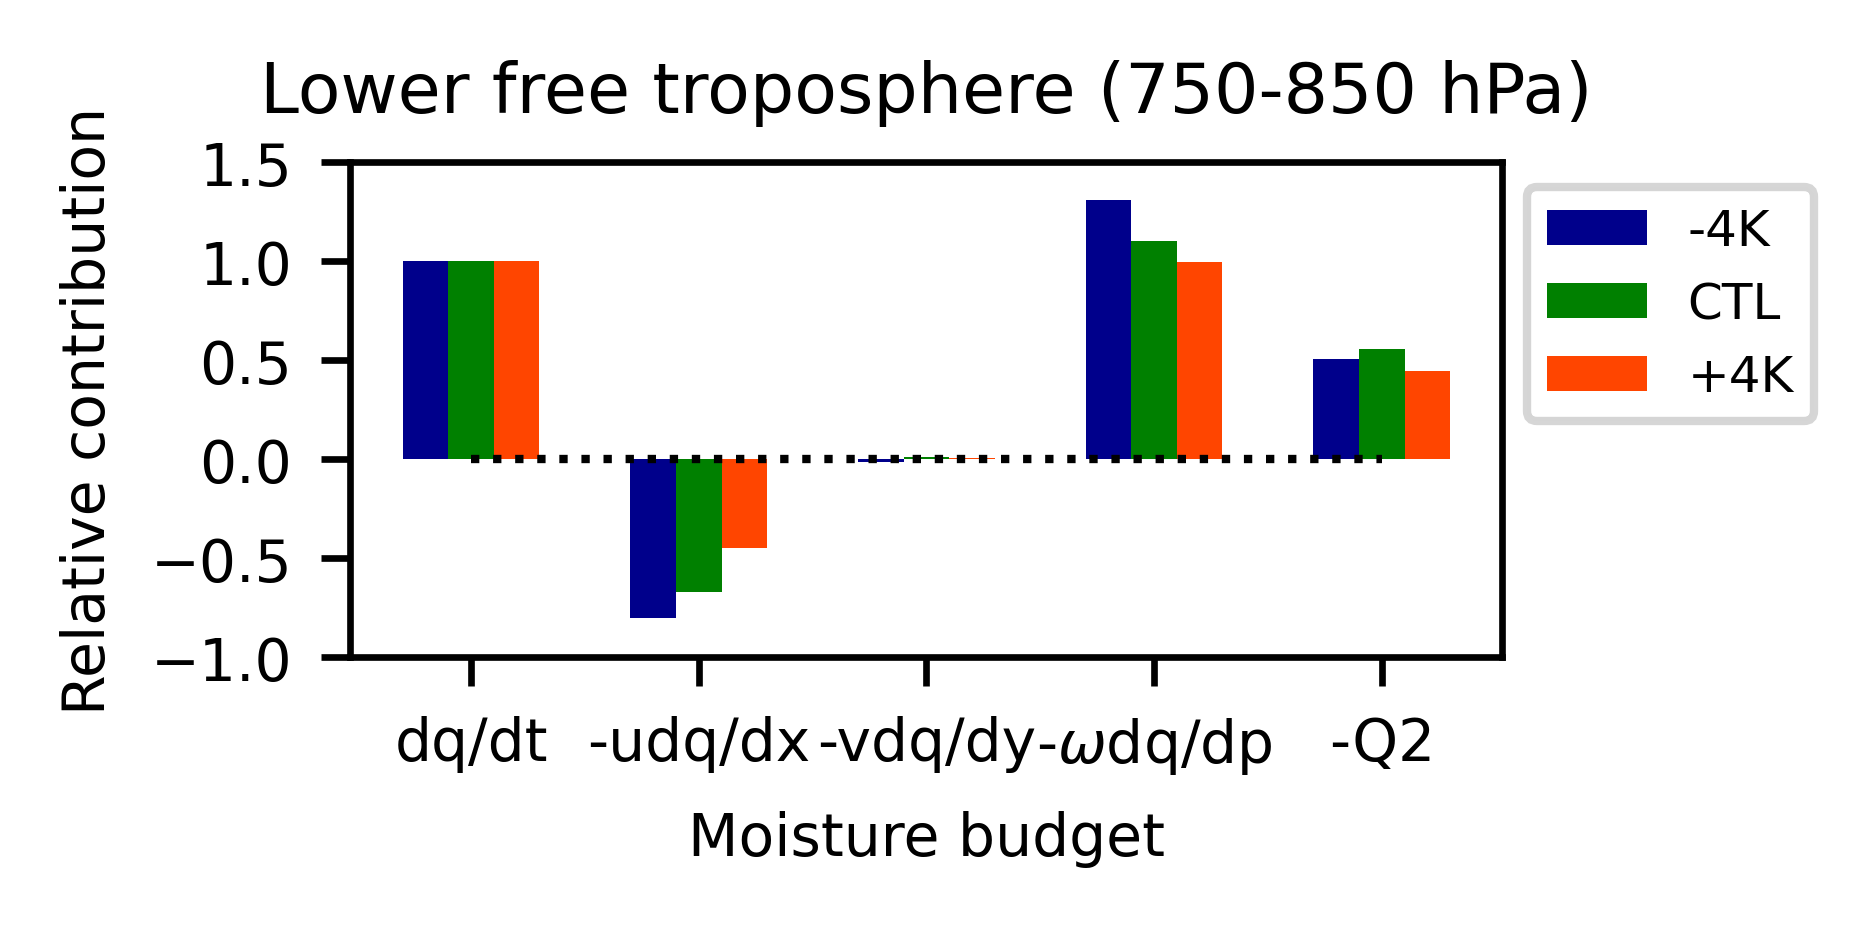

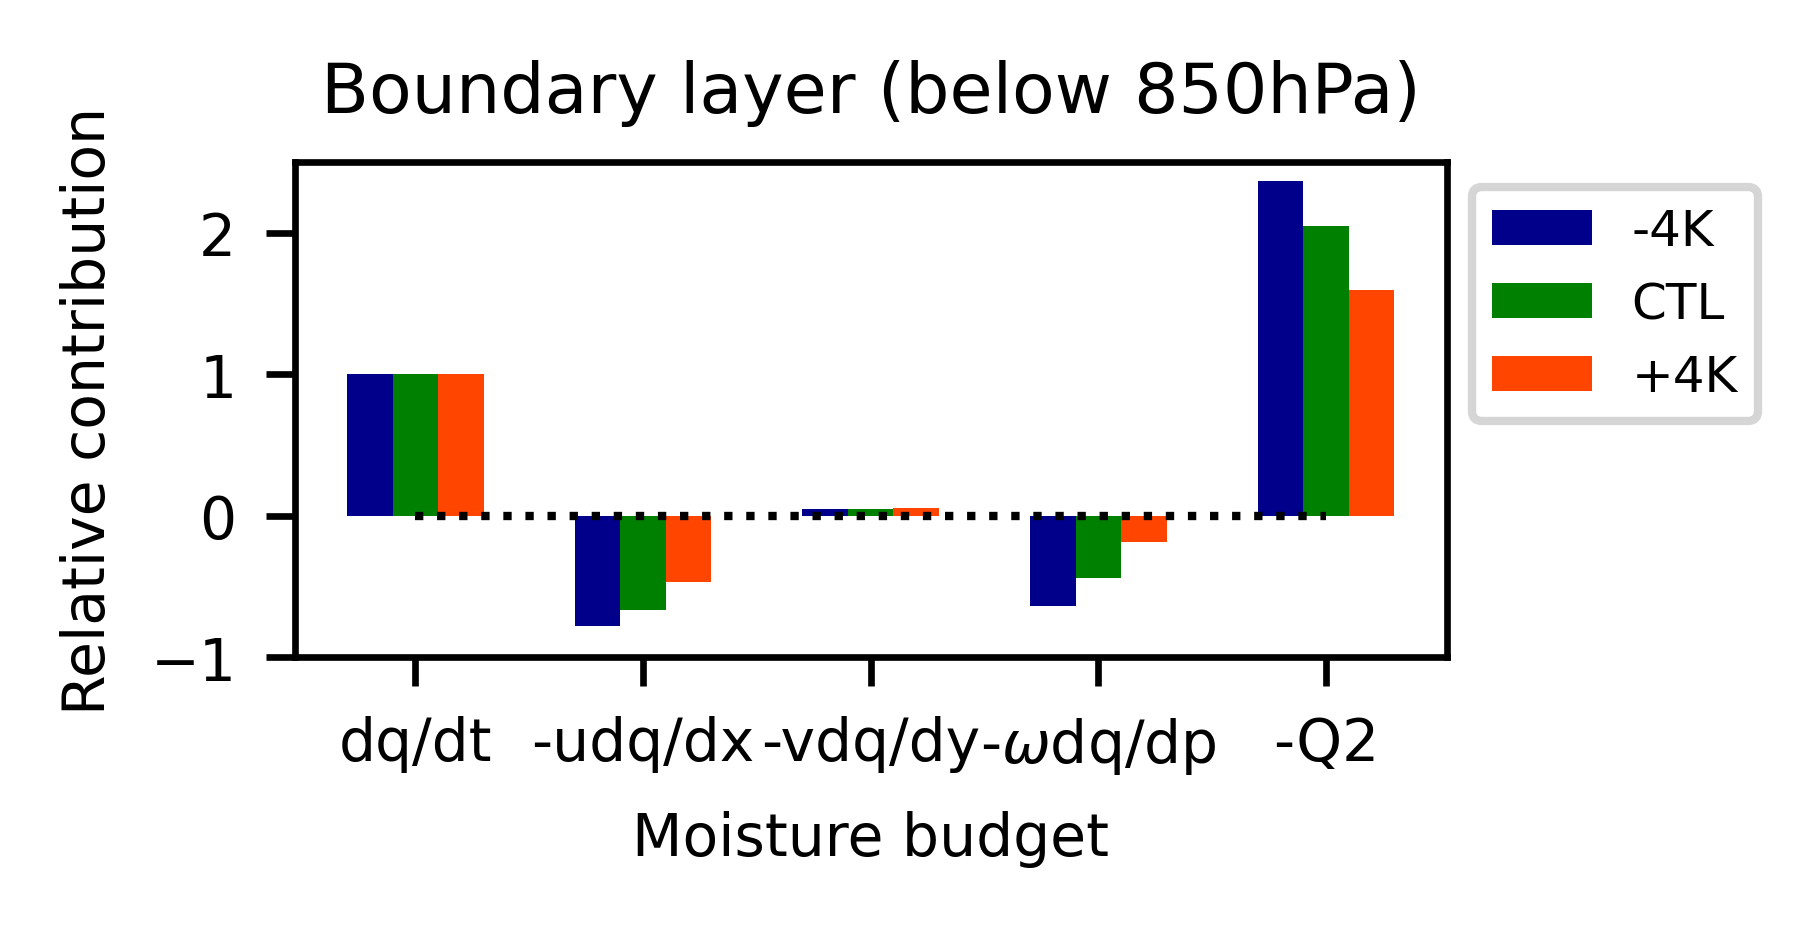

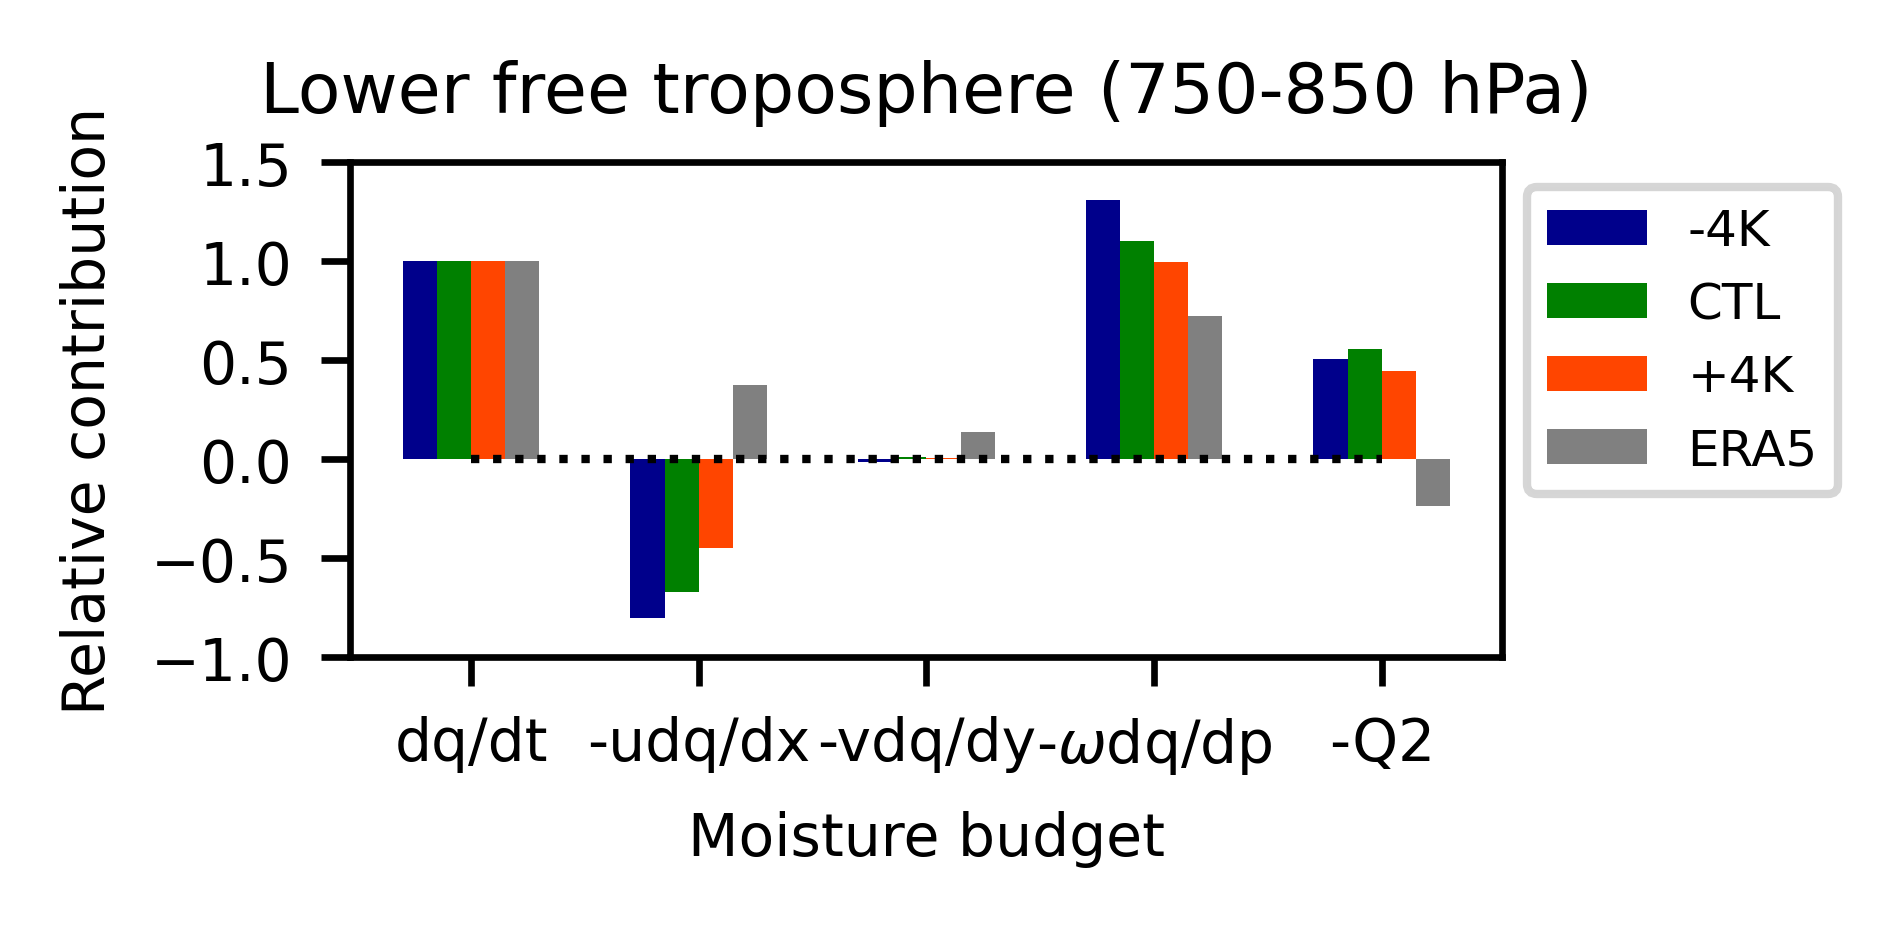

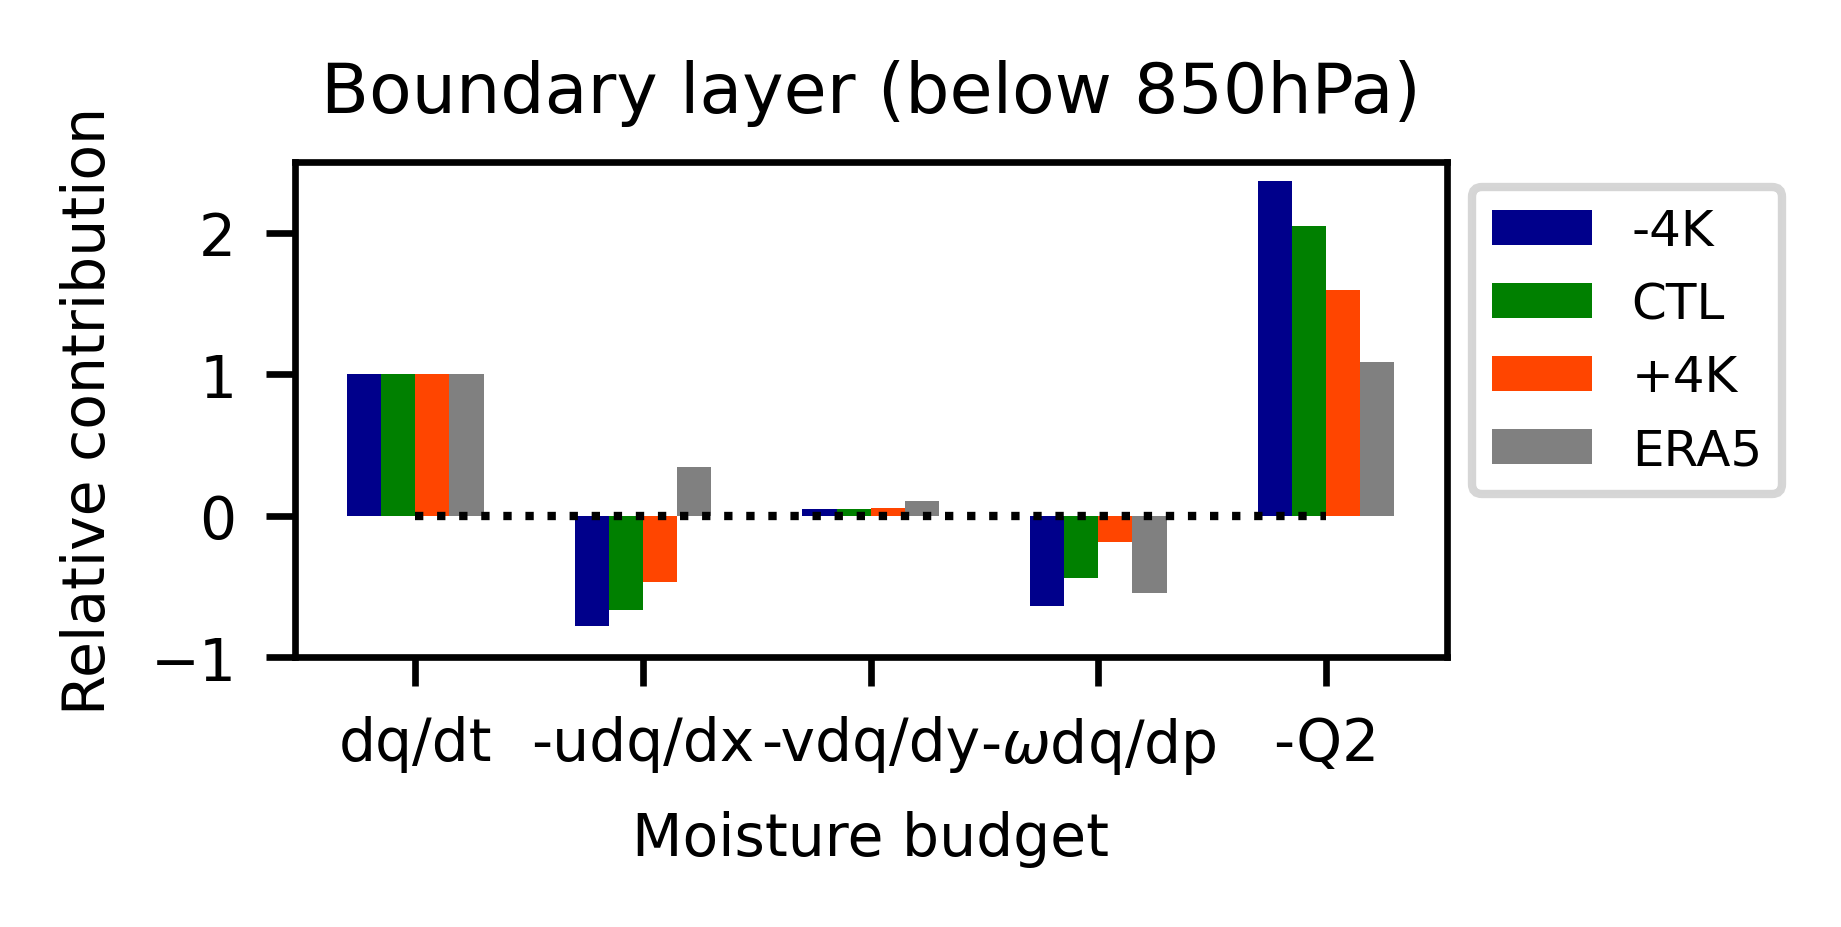

In [20]:
###########################################
# Fig. A2 (or Fig. 6): Moisture budget analysis (Fig. A2 has ERA5, Fig. 6 only aqua simulations)
###########################################
font = 7
save_budget_contribution_aqua = 1 # 0 (saving) or 1 (already saved) 
title_list = list(['All levels','Lower free troposphere (750-850 hPa)','Boundary layer (below 850hPa)'])
figname_list = list(['all_level','750_850','850_1000'])
r_name = list(['','_lf','_bl'])
ERA5_or_not = list(['','_ERA5'])

for plot_ERA5 in range(0,2): # If plot_ERA5==0, Fig.6 is plotted. If plot_ERA5==1, Fig.A2 is plotted
    
    if save_budget_contribution_aqua == 0:
        
        for icase in range(0,3):
        
            # Load aquaplanet simulation data
            if icase != 1:
                CASENAME  = CASENAME_LIST2[icase]+'_3h_20y_CLUBB_new'
            else:
                CASENAME  = CASENAME_LIST2[icase]+'_3h_20y_CLUBB_new_uv_tendency'
            output_dir = dir_out+'output_data/'+CASENAME+'/'
            data     = np.load(output_dir+'dqdt_udqdx_vdqdy_wdqdp_Q2_kwcomposite.npz')
            dqdt_KW  = data['dqdt_KW'][:,1:-1]
            udqdx_KW = data['udqdx_KW'][:,1:-1]
            vdqdy_KW = data['vdqdy_KW'][:,1:-1]
            wdqdp_KW = data['wdqdp_KW'][:,1:-1]
            Q2_KW    = data['Q2_KW'][:,1:-1]
            plev_KW  = data['plev'][1:-1]
            phase    = data['phase']
            
            ilev_min_lf = np.argwhere(plev_KW==750).squeeze()
            ilev_max_lf = np.argwhere(plev_KW==850).squeeze()
            ilev_min_bl = np.argwhere(plev_KW==850).squeeze()
            ilev_max_bl = np.size(plev_KW)
        
            if icase == 0:
                r_dqdt_lf = np.empty([4])
                r_udqdx_lf = np.empty([4])
                r_vdqdy_lf = np.empty([4])
                r_wdqdp_lf = np.empty([4])
                r_Q2_lf = np.empty([4])
                r_res_lf = np.empty([4])
                #
                r_dqdt_bl = np.empty([4])
                r_udqdx_bl = np.empty([4])
                r_vdqdy_bl = np.empty([4])
                r_wdqdp_bl = np.empty([4])
                r_Q2_bl = np.empty([4])
                r_res_bl = np.empty([4])
        
            # Lower free troposphere
            dqdt_sum = np.sum(dqdt_KW[:,ilev_min_lf:ilev_max_lf+1]**2)
            r_dqdt_lf[icase]  = np.sum(dqdt_KW[:,ilev_min_lf:ilev_max_lf+1]*dqdt_KW[:,ilev_min_lf:ilev_max_lf+1])/dqdt_sum
            r_udqdx_lf[icase] = np.sum(dqdt_KW[:,ilev_min_lf:ilev_max_lf+1]*(-udqdx_KW[:,ilev_min_lf:ilev_max_lf+1]))/dqdt_sum
            r_vdqdy_lf[icase] = np.sum(dqdt_KW[:,ilev_min_lf:ilev_max_lf+1]*(-vdqdy_KW[:,ilev_min_lf:ilev_max_lf+1]))/dqdt_sum
            r_wdqdp_lf[icase] = np.sum(dqdt_KW[:,ilev_min_lf:ilev_max_lf+1]*(-wdqdp_KW[:,ilev_min_lf:ilev_max_lf+1]))/dqdt_sum
            r_Q2_lf[icase]    = np.sum(dqdt_KW[:,ilev_min_lf:ilev_max_lf+1]*(-Q2_KW[:,ilev_min_lf:ilev_max_lf+1]))/dqdt_sum
        
            # Boundary layer
            dqdt_sum = np.sum(dqdt_KW[:,ilev_min_bl:ilev_max_bl+1]**2)
            r_dqdt_bl[icase]  = np.sum(dqdt_KW[:,ilev_min_bl:ilev_max_bl+1]*dqdt_KW[:,ilev_min_bl:ilev_max_bl+1])/dqdt_sum
            r_udqdx_bl[icase] = np.sum(dqdt_KW[:,ilev_min_bl:ilev_max_bl+1]*(-udqdx_KW[:,ilev_min_bl:ilev_max_bl+1]))/dqdt_sum
            r_vdqdy_bl[icase] = np.sum(dqdt_KW[:,ilev_min_bl:ilev_max_bl+1]*(-vdqdy_KW[:,ilev_min_bl:ilev_max_bl+1]))/dqdt_sum
            r_wdqdp_bl[icase] = np.sum(dqdt_KW[:,ilev_min_bl:ilev_max_bl+1]*(-wdqdp_KW[:,ilev_min_bl:ilev_max_bl+1]))/dqdt_sum
            r_Q2_bl[icase]    = np.sum(dqdt_KW[:,ilev_min_bl:ilev_max_bl+1]*(-Q2_KW[:,ilev_min_bl:ilev_max_bl+1]))/dqdt_sum
        
        r_res_lf   = 1-r_udqdx_lf-r_vdqdy_lf-r_wdqdp_lf-r_Q2_lf
        r_res_bl   = 1-r_udqdx_bl-r_vdqdy_bl-r_wdqdp_bl-r_Q2_bl
    
        nlev_KW = np.size(plev_KW)
    
        # contributino to dqdt
        for icase in range(0,3):
            if icase == 0:
                r_lf = np.empty([6,4])
                r_bl = np.empty([6,4])

            for i in range(1,3):        
                
                if i == 1:
                    r_lf[:,icase] = np.array([r_dqdt_lf[icase], r_udqdx_lf[icase], r_vdqdy_lf[icase], \
                                                  r_wdqdp_lf[icase], r_Q2_lf[icase], r_res_lf[icase]])
                else:
                    r_bl[:,icase] = np.array([r_dqdt_bl[icase], r_udqdx_bl[icase], r_vdqdy_bl[icase], \
                                                  r_wdqdp_bl[icase], r_Q2_bl[icase], r_res_bl[icase]])
    
        budget_term_list = list(['r_dqdt', 'r_udqdx','r_vdqdy','r_wdqdp','r_Q2','r_res'])
        # Save output for aqua simulations
        np.savez(output_dir_all+'Contribution_of_each_moisture_budget_to_dqdt.npz',\
                    r_lf = r_lf[:,:3], r_bl=r_bl[:,:3], budget_term_list=budget_term_list)

    else: # Load saved contribution from aqua simulation
        data = np.load(output_dir_all+'Contribution_of_each_moisture_budget_to_dqdt.npz')
        budget_term_list = data['budget_term_list']
        n_term = np.size(budget_term_list)
        r_lf = np.empty([n_term,4])
        r_bl = np.empty([n_term,4])
        r_lf[:,:3] = data['r_lf']
        r_bl[:,:3] = data['r_bl']

    # Load ERA5
    for icase in range(3,4): 
        #data     = np.load(dir_in_ERA5+'Contribution_of_each_moisture_budget_to_dqdt_IO.npz') # Original directory
        data     = np.load(output_dir_all+'ERA5/Contribution_of_each_moisture_budget_to_dqdt_IO.npz') # Updated directory (same data as above)
        r_lf[:,icase] = data['r_650_700']
        r_bl[:,icase] = data['r_850_1000']

    for i in range(1,3):
        # Plot bar plot of relative contribution of each buget term
        fig,axes = plt.subplots(1,1,figsize=(3.2, 1.5),dpi=600)
        dx = 0.15
        ax = plt.gca()
        plt.subplots_adjust(left=0.2,right=0.8,top=0.8,bottom=0.25)
        plt.rcParams.update({'font.size': font})
        x = np.arange(0,5)
        zero = np.zeros([np.size(x)])
        r = globals()['r'+r_name[i]]
        if plot_ERA5 == 1:
            dx = 0.15
        else:
            dx = 0.2    
        plt.bar(x, r[:-1, 0], color='darkblue',width=dx)
        plt.bar(x+dx, r[:-1, 1], color='green',width=dx)
        plt.bar(x+dx*2, r[:-1, 2], color='orangered',width=dx)
        if plot_ERA5 == 1:
            plt.bar(x+dx*3, r[:-1, 3], color='grey',width=dx)
            ax.legend(['-4K','CTL','+4K','ERA5'],bbox_to_anchor=(1, 1), loc='upper left',fontsize=6)
            plt.plot(x+dx*1.5, zero, 'k:', linewidth=1)
            plt.xticks(x+dx*1.5,('dq/dt','-udq/dx','-vdq/dy','-$\omega$dq/dp','-Q2'))
        else:
            ax.legend(['-4K','CTL','+4K'],bbox_to_anchor=(1, 1), loc='upper left',fontsize=6)
            plt.plot(x+dx, zero, 'k:', linewidth=1)
            plt.xticks(x+dx,('dq/dt','-udq/dx','-vdq/dy','-$\omega$dq/dp','-Q2'))
        plt.xlabel('Moisture budget')
        plt.ylabel('Relative contribution')
        plt.title(title_list[i])
        
        if i == 0 or i == 1:
            plt.yticks(np.arange(-1,2,0.5))
            plt.ylim([-1,1.5])
        elif i == 2:
            plt.ylim([-1,2.5])
            plt.yticks(np.arange(-1,3,1))
        if plot_ERA5 == 0:
            plt.savefig(figdir_all+'Fig.6_dqdt_contribution'+r_name[i]+ERA5_or_not[plot_ERA5]+'.png',dpi=600)
        else:
            plt.savefig(figdir_all_appendix+'Fig.A2_dqdt_contribution'+r_name[i]+ERA5_or_not[plot_ERA5]+'.png',dpi=600)
        plt.show()

In [43]:
#######################################
# Load data for Fig. A3: plot KW composite vertical structure
#######################################################
for icase in range(0,4):

    if icase < 3:
        
        # Load moisture budget term from aquaplanet simulations
        data = np.load(output_dir_all+'KW_composite_3D_all.npz')
        Q2moist_KW = data['Q2moist_KW_all'][:] # Note that this actually represents -Q2_KW, so that the sign is consistent with dqdt_KW
        wdqdp_KW   = data['wdqdp_KW_all'][:] # Note that this actually represents -wdqdp_KW, so that the sign is consistent with dqdt_KW
        dqdt_KW    = data['dqdt_KW_all'][:] 
        plev_dqdt  = data['plev']
    else:
        # Load moisture budget from ERA5
        save_qbudget_era5 = 0
        if save_qbudget_era5 == 0:
            data = np.load(dir_in_ERA5+'KWcomposite_Q2_dqdt_udqdx_vdqdy_wdpdq_IO.npz') # Original directory
            plev_dqdt_ERA5  = data['plev']
            dqdt_KW_ERA5    = data['dqdt_KW']
            Q2moist_KW_ERA5 = -data['Q2_KW']
            wdqdp_KW_ERA5   = -data['wdqdp_KW']
            udqdx_KW_ERA5   = -data['udqdx_KW']
            vdqdy_KW_ERA5   = -data['vdqdy_KW']
            phase           = data['phase']
            lon_IO          = data['lon_IO']
            np.savez(output_dir_all+'ERA5/KW_compostie_3D_Q2_dqdt_udqdx_vdqdy_wdqdp_ERA5.npz',\
                    plev=plev_dqdt_ERA5, phase=phase, lon_IO=lon_IO,\
                    dqdt_KW_ERA5 = dqdt_KW_ERA5, Q2moist_KW_ERA5=Q2moist_KW_ERA5, wdqdp_KW_ERA5=wdqdp_KW_ERA5,\
                    udqdx_KW_ERA5 = udqdx_KW_ERA5, vdqdy_KW_ERA5=vdqdy_KW_ERA5)
        else:
            data = np.load(output_dir_all+'ERA5/KW_compostie_3D_Q2_dqdt_udqdx_vdqdy_wdqdp_ERA5.npz')
            plev_dqdt_ERA5  = data['plev']
            dqdt_KW_ERA5    = data['dqdt_KW_ERA5']
            Q2moist_KW_ERA5 = data['Q2moist_KW_ERA5']
            wdqdp_KW_ERA5   = data['wdqdp_KW_ERA5']
            udqdx_KW_ERA5   = data['udqdx_KW_ERA5']
            vdqdy_KW_ERA5   = data['vdqdy_KW_ERA5']
            phase           = data['phase']
            lon_IO          = data['lon_IO']            

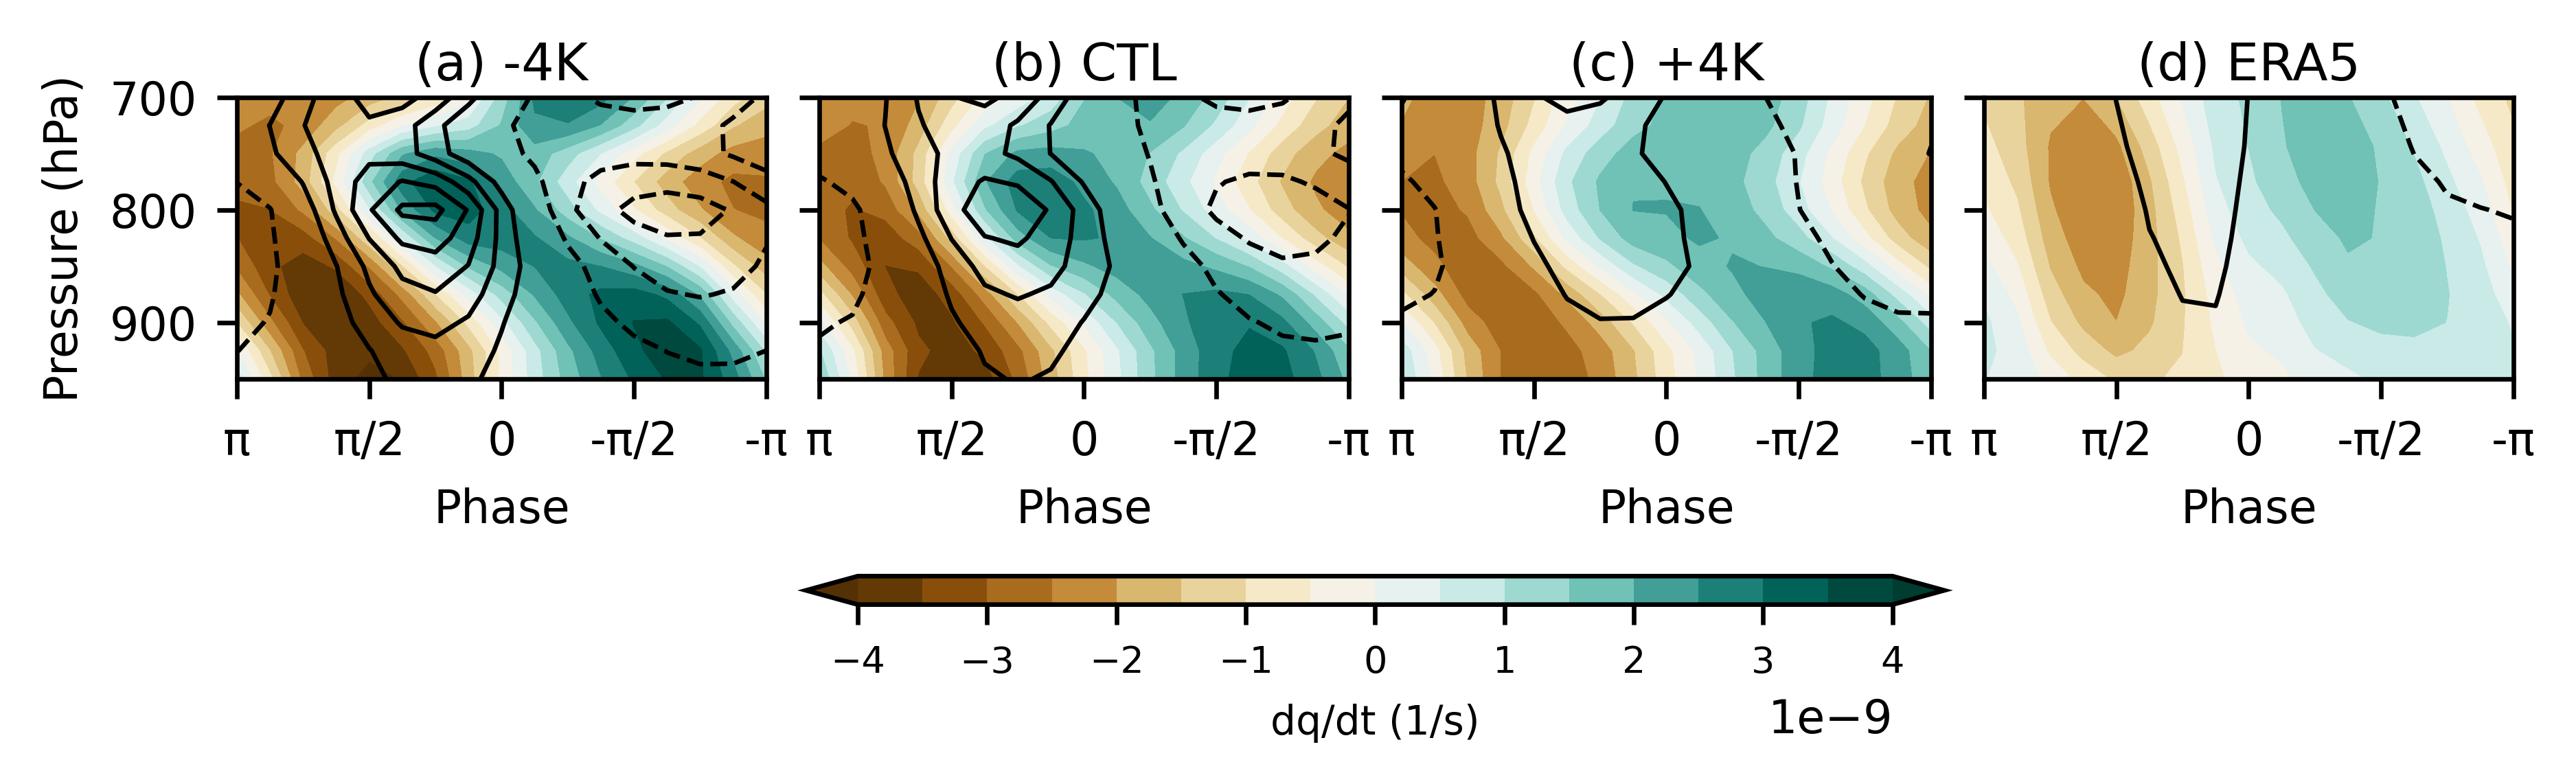

In [51]:
################################################
# Figure A3: Plot KW composite moisture budget analysis vertical structure  (Fig. A3)
# dqdt (shading) and wdqdp (contour)
###################################################
dqdt_q = 0 # 0 (plot dqdt) or 1 (plot q)
plev_plot_min = 700 #700 #400
plev_int = 100

font = 8
title = list(['(a) -4K', '(b) CTL','(c) +4K','(d) ERA5'])
pltnum = np.size(title)
VAR_cn_list = list(['Q2moist_KW','Q2moist_KW','wdqdp_KW','wdqdp_KW','wdqdp_KW',\
                    'wdqdp_KW','wdqdp_KW','wdqdp_KW'])

if dqdt_q == 0:
    VAR_cf_list = list(['dqdt_KW','RH_KW_all','dqdt_KW','qli_KW','Q_CLUBB_KW','Q_ZM_KW','Q_KW','Q_ZM_EVAP_KW'])
    VAR_cf_ERA5_list = list(['dqdt_KW_ERA5','dqdt_KW_ERA5','dqdt_KW_ERA5','dqdt_KW_ERA5','dqdt_KW_ERA5',\
                             'dqdt_KW_ERA5','dqdt_KW_ERA5','dqdt_KW_ERA5'])
    #VAR_cf_ERA5_list = list([''dqdt_KW_ERA5','RH_KW_ERA5','dqdt_KW_ERA5'])
    cblabel_list = list(['dq/dt (1/s)','RH (%)','dq/dt (1/s)','ql+qi (g/kg)','Q$_{CLUBB}$ (K/day)',\
                         'Q$_{ZM}$ (K/day)','Q$_{Total}$ (K/day)','Q$_{ZM,EVAP}$ (K/day)'])
    figname_list = list(['dqdt_Q2','RH_Q2','dqdt_wdqdp','qlqi_wdqdp','Qclubb_wdqdp',\
                         'Qzm_wdqdp','Qtot_wdqdp','Qzm_evap_wdqdp'])
else:
    VAR_cf_list = list(['qv_kw_all','RH_KW_all','qv_kw_all'])
    VAR_cf_ERA5_list = list(['qv_kw_ERA5','qv_kw_ERA5','qv_kw_ERA5'])
    cblabel_list = list(['qv (g/kg)','RH (%)','qv (g/kg)'])
    figname_list = list(['q_Q2','RH_Q2','q_wdqdp'])
VAR_cn_ERA5_list = list(['Q2moist_KW_ERA5','Q2moist_KW_ERA5','wdqdp_KW_ERA5','wdqdp_KW_ERA5','wdqdp_KW_ERA5',\
                         'wdqdp_KW_ERA5','wdqdp_KW_ERA5','wdqdp_KW_ERA5'])


color_list = list(['BrBG','RdBu','BrBG','seismic_r','PiYG_r','PiYG_r','PiYG_r','PiYG_r'])
for ifig in range(2,3):#0,np.size(VAR_cn_list)): #0: q(shading) and Q2 (contour), #1: RH(shading) and Q2 (contour)
    
    if pltnum == 3:
        fig,axes = plt.subplots(1,pltnum,figsize=(5.5, 2.4),dpi=600)
    elif pltnum == 4 and plev_plot_min > 500:
        fig,axes = plt.subplots(1,pltnum,figsize=(6.5, 1.8),dpi=600)
    elif pltnum == 4 and plev_plot_min < 300:
        print('Figure with larger width')
        fig,axes = plt.subplots(1,pltnum,figsize=(6.5, 3.2),dpi=600)
    plt.subplots_adjust(left=0.1,right=0.95,top=0.9,bottom=0.14,wspace=0.1)
    plt.rcParams.update({'font.size': font})

    if ifig == 0 or ifig == 2:
        if dqdt_q == 1:
            clev = np.arange(-0.22,0.24,0.02) # plot qv
        else:
            clev = np.arange(-4,4.5,0.5)*10**(-9) # plot dqdt
    elif ifig == 1:
        clev = np.arange(-5,5.5,0.5)
    elif ifig == 3:
        #clev = np.arange(-0.0105,0.012,0.0015)
        if plev_plot_min < 300:
            clev = np.arange(-0.011,0.012,0.001)
        else:
            clev = np.arange(-0.011,0.013,0.002)
    elif ifig == 4:
        clev = np.arange(-0.4,0.45,0.05)
    elif ifig >= 5 and ifig <7:
        clev = np.arange(-2.4,2.7,0.3)
    elif ifig == 7:
        clev = np.arange(-1.2,1.4,0.2)
        
    if ifig == 0 or ifig == 1:
        clev_n = np.arange(-1.6,0,0.2)*10**(-8)
        clev_p = np.arange(0.2,1.8,0.2)*10**(-8) 
    else:
        clev_n = np.arange(-1.8,0,0.3)*10**(-8)
        clev_p = np.arange(0.3,2.1,0.3)*10**(-8)         
    VAR_cn = globals()[VAR_cn_list[ifig]]
    VAR_cf = globals()[VAR_cf_list[ifig]]
    VAR_cn_ERA5 = globals()[VAR_cn_ERA5_list[ifig]]
    VAR_cf_ERA5 = globals()[VAR_cf_ERA5_list[ifig]]
    if dqdt_q == 1:
        VAR_cf_ERA5 = VAR_cf_ERA5[:,:,0,-1]

    if ifig == 1:
        VAR_cf = VAR_cf*100
        VAR_cf_ERA5 = VAR_cf_ERA5*100
    
    for icase in range(0,4):
        plt.subplot(1, pltnum,icase+1)
        ax = plt.gca()
        plt.title(title[icase], pad=3, loc='center',fontsize=9)        
        if icase < 3:
            xx, yy = np.meshgrid(phase,plev_dqdt)
            xx_cn, yy_cn = np.meshgrid(phase,plev_dqdt)
            cf  = plt.contourf(xx, yy, VAR_cf[:,:,icase].T, levels=clev, cmap=color_list[ifig], extend='both' )
            cn_p = plt.contour(xx_cn, yy_cn, VAR_cn[:,:,icase].T, levels=clev_p, colors='k', linewidths=0.8)
            cn_n = plt.contour(xx_cn, yy_cn, VAR_cn[:,:,icase].T, levels=clev_n, colors='k', linestyles='dashed',linewidths=0.8) 
        elif icase == 3:
            if dqdt_q == 1:
                xx, yy = np.meshgrid(phase,plev_ERA5)
            else:
                xx, yy = np.meshgrid(phase,plev_dqdt_ERA5)
            xx_cn, yy_cn = np.meshgrid(phase,plev_dqdt_ERA5)
            cf  = plt.contourf(xx, yy, VAR_cf_ERA5[:,:].T, levels=clev, cmap=color_list[ifig], extend='both' )
            cn_p = plt.contour(xx_cn, yy_cn, VAR_cn_ERA5[:,:].T, levels=clev_p, colors='k', linewidths=0.8)
            cn_n = plt.contour(xx_cn, yy_cn, VAR_cn_ERA5[:,:].T, levels=clev_n, colors='k', linestyles='dashed',linewidths=0.8) 
        plt.ylim([plev_plot_min,950])
        plt.xlabel('Phase')
        plt.yticks(np.arange(plev_plot_min,1000,plev_int))
        plt.gca().invert_yaxis()
        plt.xticks(bin_simple2,(PI,PI+'/2','0','-'+PI+'/2','-'+PI),fontsize=8)
        plt.tick_params(bottom=True,top=False,left=True,right=False)
        if icase == 0:
            plt.tick_params(labelbottom=True,labeltop=False,labelleft=True,labelright=False)
            ax.set_ylabel('Pressure (hPa)',fontsize=font)
        elif icase == pltnum-1:
            plt.tick_params(labelbottom=True,labeltop=False,labelleft=False,labelright=False)
        else:
            plt.tick_params(labelbottom=True,labeltop=False,labelleft=False,labelright=False)
    if pltnum == 4 and plev_plot_min < 300:
        cb = plt.colorbar(cf, ax = axes, orientation = 'horizontal', shrink=.5, aspect=40,pad=0.2) 
    else:
        cb = plt.colorbar(cf, ax = axes, orientation = 'horizontal', shrink=.5, aspect=40,pad=0.35) 
    cb.set_label(cblabel_list[ifig],fontsize=7)
    cb.ax.tick_params(labelsize=6.5)
    if ifig == 3:
        cb.set_ticks(np.arange(-0.009,0.015,0.006) ) 
    plt.savefig(figdir_all_appendix+'Fig.A3_KWcomposite_'+figname_list[ifig]+'_'+str(plev_plot_min)+'hPa.png',dpi=600)  
    plt.show()